In [11]:
import tensorflow as tf
import tensorflow_hub as tf_hub

In [12]:
#Check for GPU availability
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]


## Getting Data Ready i.e. turning them into tensors

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [17]:
labels_csv = pd.read_csv('data/labels.csv')
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,6047c362f38f0cef1fc26ea7ff7df0a1,scottish_deerhound
freq,1,126


In [16]:
labels_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


<IPython.core.display.Javascript object>


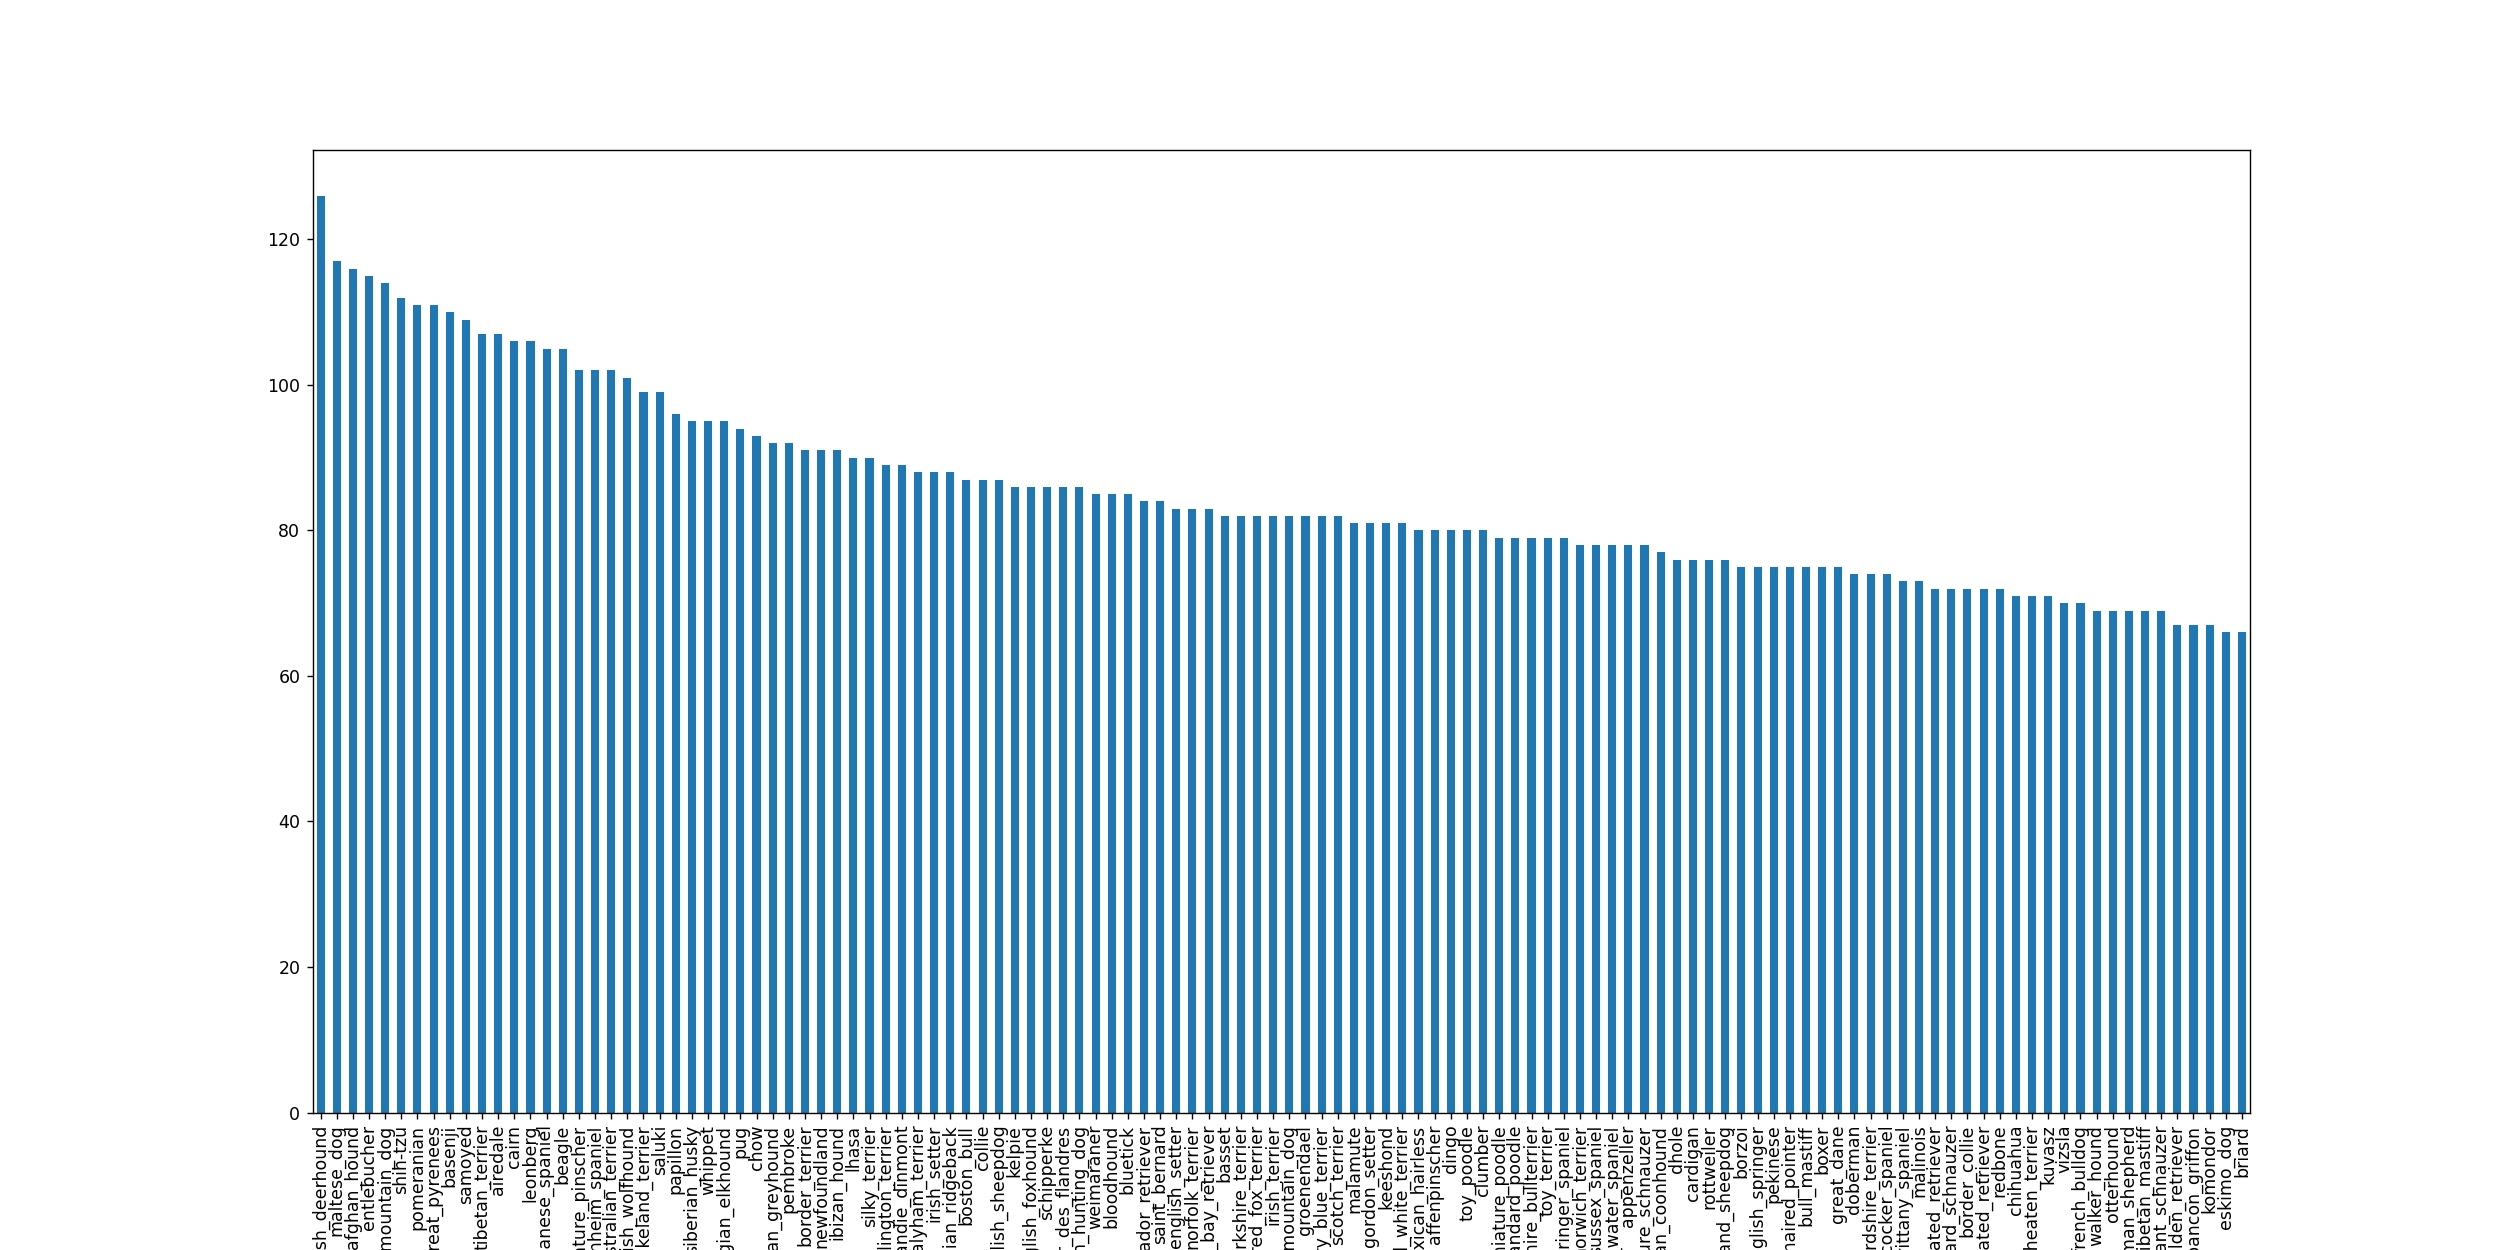

In [23]:
### Images for each Breed
%matplotlib notebook
labels_csv['breed'].value_counts().plot.bar(figsize = (20, 10))

In [28]:
labels_csv.breed.value_counts().median(), labels_csv.breed.value_counts().mean()

(82.0, 85.18333333333334)

## Preparing the Images

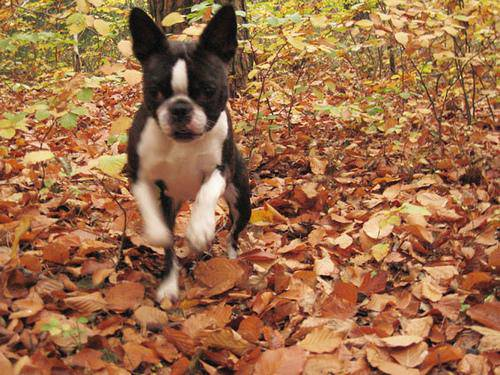

In [34]:
Image.open('data/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [40]:
filenames = [f'data/train/{fname}.jpg' for fname in labels_csv.id]

In [41]:
filenames[:10]

['data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [44]:
len(os.listdir('data/train')) == len(filenames)

True

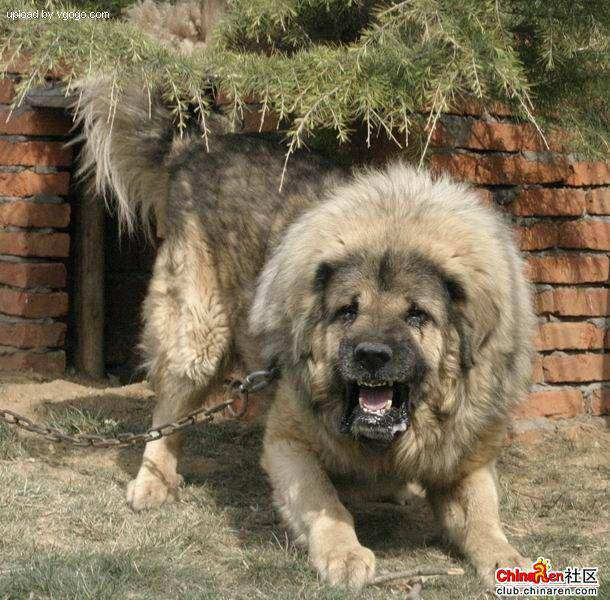

In [46]:
Image.open(filenames[9000])

In [48]:
labels = np.array(labels_csv['breed'])
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [50]:
len(labels) == len(os.listdir('data/train/'))

True

In [52]:
unique_breeds = np.unique(labels)

In [54]:
unique_breeds, len(unique_breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter', 'gre

In [59]:
#Turn Every label into a boolean array

boolean_labels = np.array([label == unique_breeds for label in labels])

In [61]:
boolean_labels.shape

(10222, 120)

In [62]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating validation set

In [63]:
X = filenames 
y = boolean_labels

In [64]:
# set number of images to use for experimenting

NUM_IMAGES = 1000

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES], 
                                                  test_size = 0.2, 
                                                  random_state = 42) # random state is like np.random.seed()

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [66]:
X_train[:5]

['data/train/00bee065dcec471f26394855c5c2f3de.jpg',
 'data/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 'data/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 'data/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 'data/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg']